# Python Lesson 2 – NumPy & Plots

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

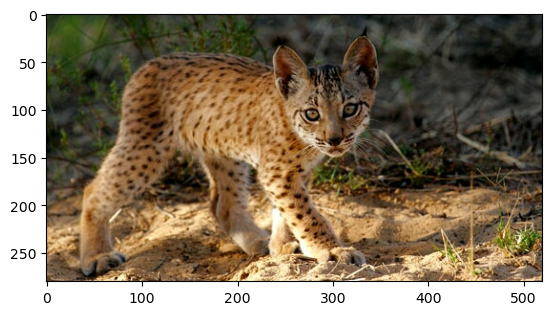

In [3]:
imgarray = np.array(Image.open("iberian-lynx.png"))
plt.imshow(imgarray)

# Exercise 2.1 (10-D array)

In [7]:
gmat = np.random.normal(0, 2, (10, 10)) # 10x 10 Gaussian matrix gmat

In [8]:
gmat_two = gmat.copy() # 10x 10 Gaussian matrix gmat copy

In [9]:
A1 = abs(gmat) < 2      # within 1 standard deviation
A2 = abs(gmat) < 4      # within 2 standard deviation


In [11]:
gmat[:] = 3             # Set all values to 3 (assume outside 2 standard deviations)
gmat[A2] = 2            # Assign 2 to elements within 2 standard deviations
gmat[A1] = 1            # Assign 1 to elements within 1 standard deviation

print(gmat, gmat_two)

[[1. 1. 1. 1. 3. 1. 1. 1. 1. 1.]
 [1. 1. 2. 1. 2. 2. 1. 2. 1. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 2. 1. 2. 2. 1.]
 [1. 3. 1. 1. 2. 1. 1. 1. 3. 1.]
 [1. 2. 2. 2. 2. 1. 2. 1. 1. 1.]
 [1. 1. 1. 3. 1. 2. 1. 2. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 2. 1.]
 [1. 1. 2. 2. 1. 1. 1. 1. 2. 1.]
 [1. 2. 1. 1. 1. 1. 1. 1. 1. 1.]] [[-0.20040922  0.69164264 -0.86921028 -1.82289598  6.33186516  0.75051333
  -0.46908525  0.26909637  0.341859   -1.58631716]
 [-1.30476422 -1.70073071  3.32036588 -0.36990484  2.01348355 -2.00505855
  -1.52696538 -2.64717942  0.9883987  -0.17304871]
 [-2.25727419 -3.00422066  2.67182087 -0.32365976  0.60662757 -1.76454191
   0.70905757  0.29163708 -1.8806517  -1.65366947]
 [-0.31415729  1.41427431 -1.35822777  2.11010096  2.55698478 -2.42874993
   0.66625792 -2.33909747  3.33596951 -1.13317957]
 [ 0.29192892  6.34774428  1.56887361  0.83039199  2.38332236 -0.77942793
  -1.69108823 -0.99998069 -4.68440921  1.16097987]
 [-0.1232202   3.88182548  2.88871578 -2.169

# Exercise 2.2 (Image into array)

In [19]:
lynx = imgarray.copy()

lowlim = 100
uplim = 200

In [20]:
lynx[lynx > uplim] = 255
lynx[lynx < lowlim] = 0

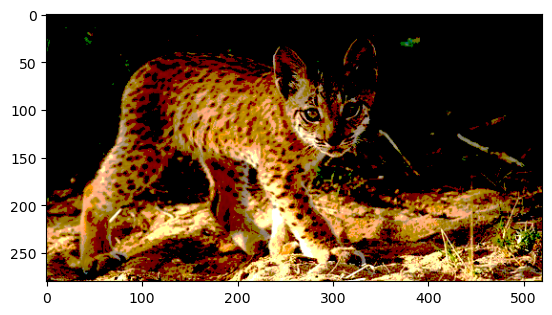

In [21]:
imgplot=plt.imshow(lynx)

# Exercise 2.3 (Monthly and annual temperature plots)

In [23]:
metdata_orig = np.loadtxt("T_Alicante_EM.csv", delimiter=",", skiprows=1)

In [25]:
temp_data = metdata_orig[:,1:].copy()        # temperature data without the year column

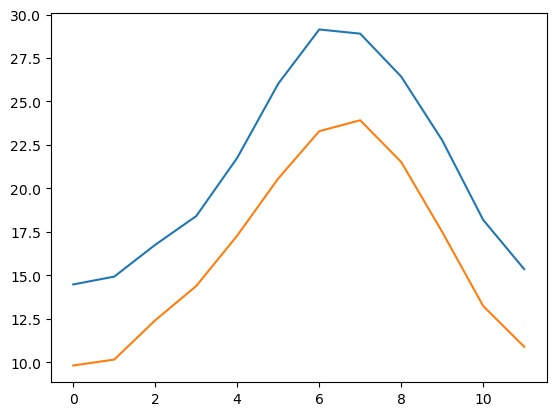

In [26]:
max_monthly = np.max(temp_data, axis=0)
min_monthly = np.min(temp_data, axis=0)
max_monthly_plot = plt.plot(max_monthly)
min_monthly_plot = plt.plot(min_monthly)

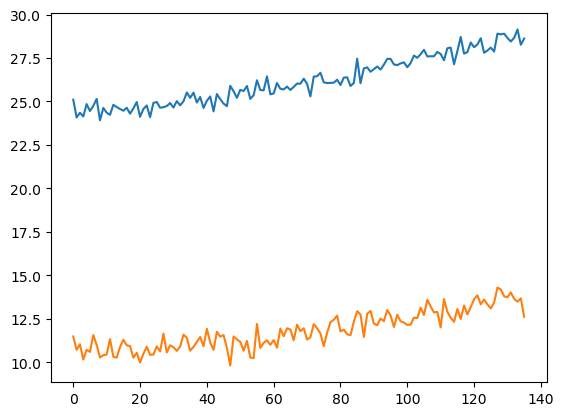

In [28]:
max_annual = np.max(temp_data, axis=1)
min_annual = np.min(temp_data, axis=1)
max_annual_plot = plt.plot(max_annual)
min_annual_plot = plt.plot(min_annual)

In [39]:
year_data = metdata_orig[:,0]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
month_diff = max_monthly - min_monthly
annual_diff = max_annual - min_annual

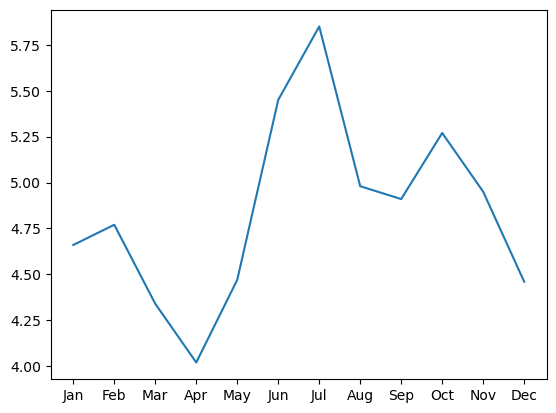

In [40]:
plt.plot(months,month_diff)

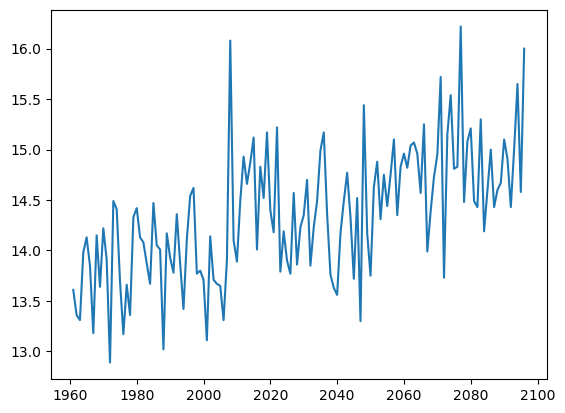

In [41]:
plt.plot(year_data,annual_diff)

# Exercise 2.4 (Monthly and annual standard deviation)

In [42]:
monthly_std = np.std(temp_data, axis=0)
annual_std = np.std(temp_data, axis=1)

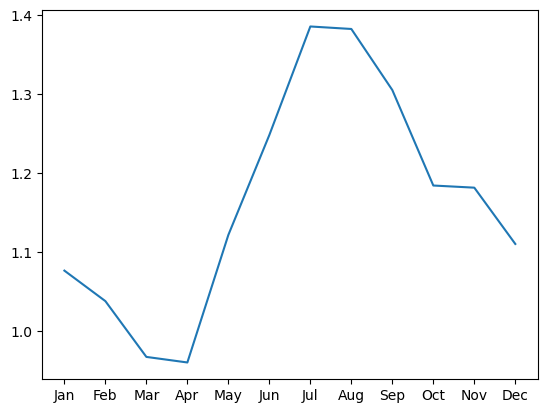

In [43]:
plt.plot(months, monthly_std)

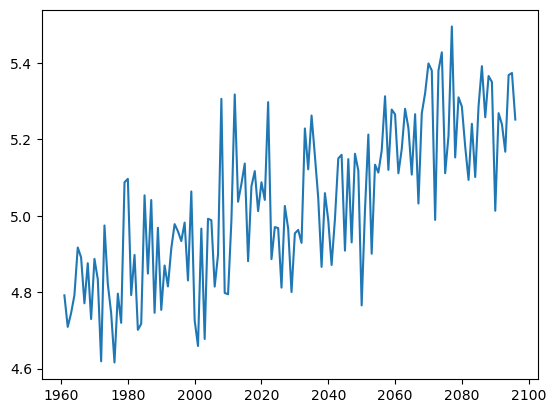

In [44]:
plt.plot(year_data, annual_std)

# Exercise 2.5 (Annual dependence)

In [46]:
spring_months = np.mean(temp_data[:,2:5],axis=1)
fall_months = np.mean(temp_data[:,8:11],axis=1)

Text(0.5, 1.0, 'Fall Average Temperature')

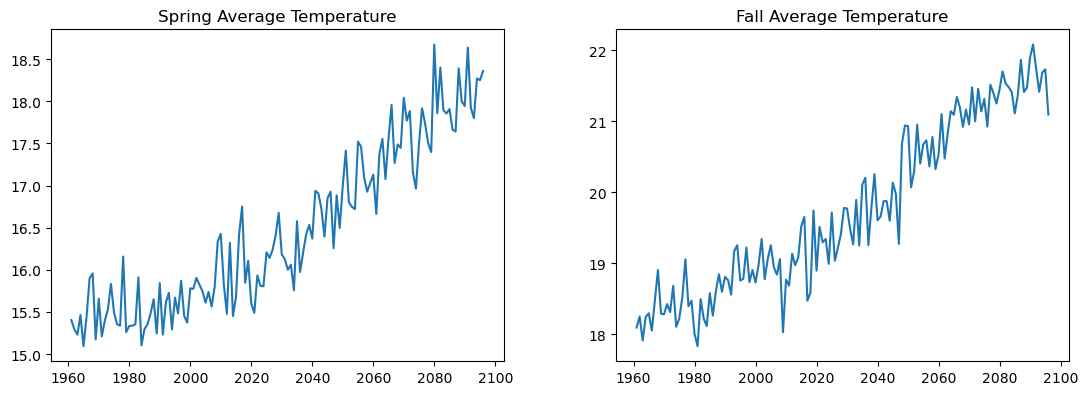

In [50]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.tight_layout(pad=5.0)
ax[0].plot(year_data,spring_months)
ax[0].set_title("Spring Average Temperature")

ax[1].plot(year_data,fall_months)
ax[1].set_title("Fall Average Temperature")